# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*Описание данных*
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки и загружаем наш файл, испльзуя разделитель
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# отобразим все колонки
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
# смотрим первые строки 
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# смотрим на размер датасета
df.shape

(23699, 22)

In [5]:
# смотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# переименуем колонки (cityCenters_nearest,parks_around3000,ponds_around3000), приведя к более удобному формату.
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                        'parks_around3000': 'parks_around_3km', 
                       'ponds_around3000' : 'ponds_around_3km'
                           })

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


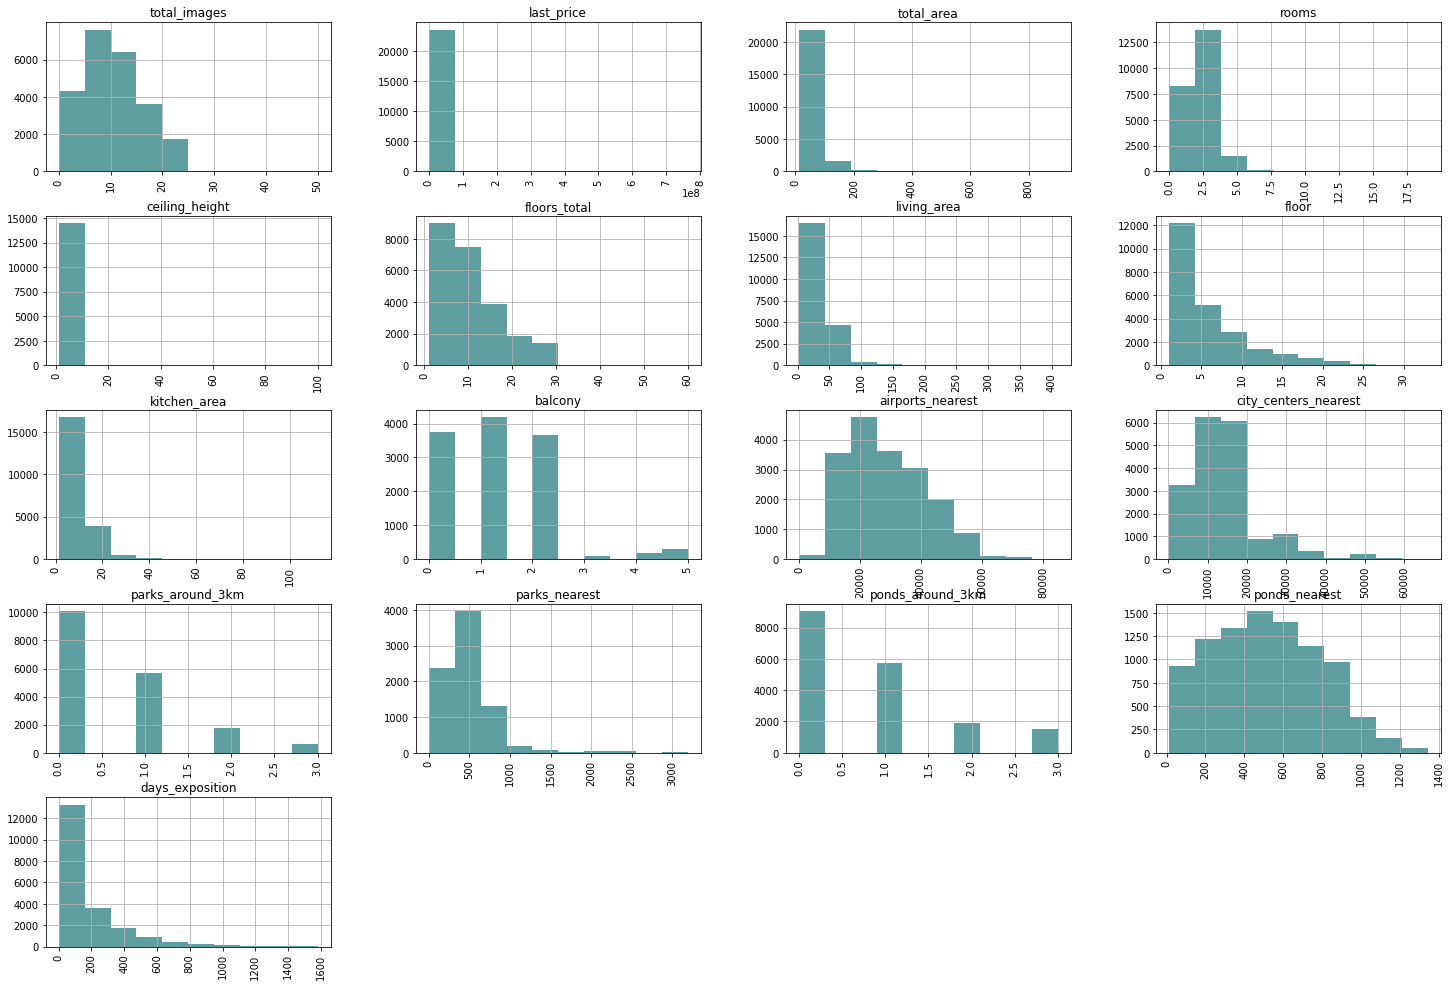

In [9]:
# создаем гистограммы по всему датафрейму
df.hist(figsize=(25,17), color='cadetblue', xrot=90);



In [10]:
# проверка на явные дубликаты
df.duplicated().sum()

0

**Выводы:**
1. В данных есть множество пропусков в столбцах.
2. Есть вопросы к типам данных: некоторые столбцы являются float, хотя логичнее было бы использовать int.
3. Тип first_day_exposition - object, надо будет привести к типу даты.
4. Есть объявление где количество комнат 0, чего быть не должно. Так  же есть объявления где расстояние ло аэропорта 0 метров, а до парка 1 м. Это тоже нужно проверить.
5.  Так же следует проверить стометровый (и однометровый) потолок в квартире. 
6. Есть аномально низкие значения в метраже жилой зоны, надо проверить.

## Предобработка данных

### Обработка повторов и аномальных значений



В нашем датасете есть аномальные значения высоты потолков(например 25 метров). Скорее всего имеют место опечатки, или непроставленные разделители в числах. Предположим, что 32 м - это на самом деле 3.2 и так далее. 

In [11]:
df.sort_values(by='ceiling_height', ascending=False).head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,False,False,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [12]:
''' 
df.loc[df.ceiling_height == 32,'ceiling_height'] = 3.2
df.loc[df.ceiling_height == 27.5,'ceiling_height'] = 2.75
df.loc[df.ceiling_height == 27,'ceiling_height'] = 2.7
df.loc[df.ceiling_height == 26,'ceiling_height'] = 2.6
df.loc[df.ceiling_height == 25,'ceiling_height'] = 2.5
df.loc[df.ceiling_height == 24,'ceiling_height'] = 2.4
df.loc[df.ceiling_height == 22.6,'ceiling_height'] = 2.26
'''

df.loc[(df['ceiling_height'] >= 21.0) & (df['ceiling_height'] <= 42.0), 'ceiling_height'] = df['ceiling_height'] / 10

В этом столбце всё еще остались аномальные значения. По СанПину высота потолков должна быть от 2,1 м( для проходных зон), до 4,2 метров (для сталинок). Посмотрим , сколько значений выбивается из рамок.

In [13]:
df.query('0 <= ceiling_height <= 2.1 or ceiling_height >= 4.2').ceiling_height.count()

60

In [14]:
# df.loc[(df['ceiling_height'] < 2.1) | (df['ceiling_height'] > 4.2), 'ceiling_height'] = df['ceiling_height'].median()

In [15]:
#df = df.loc[(df['ceiling_height'] > 2.1) & (df['ceiling_height'] < 4.2)]

In [17]:
# код ревьюера
condition = (df['ceiling_height'] < 2.1)|(df['ceiling_height'] > 4.2)
df.drop(df[condition].index, inplace=True)

50


In [19]:
df.sort_values(by='ceiling_height', ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
6901,14,15500000.0,107.0,2017-11-21T00:00:00,3,4.20,6.0,60.0,3,NaN,False,False,25.0,NaN,Санкт-Петербург,22148.0,4291.0,1.0,679.0,0.0,NaN,289.0
2843,15,11990000.0,104.0,2018-03-13T00:00:00,3,4.20,3.0,66.0,2,NaN,False,False,15.0,NaN,Санкт-Петербург,22393.0,3884.0,0.0,NaN,0.0,NaN,350.0
7279,4,18000000.0,127.0,2016-05-17T00:00:00,3,4.20,3.0,83.8,1,NaN,False,False,11.4,NaN,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,970.0
22055,2,8550000.0,75.1,2017-08-09T00:00:00,3,4.20,6.0,52.5,3,NaN,False,False,8.0,NaN,Санкт-Петербург,23060.0,2602.0,1.0,584.0,0.0,NaN,477.0
19041,8,23750000.0,124.0,2016-11-25T00:00:00,3,4.20,6.0,67.0,2,NaN,False,False,26.0,NaN,Санкт-Петербург,23568.0,1898.0,3.0,515.0,3.0,264.0,775.0
11128,12,10300000.0,80.5,2018-02-01T00:00:00,3,4.20,5.0,37.0,5,NaN,False,False,34.0,1.0,Пушкин,19907.0,32061.0,0.0,NaN,0.0,NaN,105.0
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,False,False,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
20873,18,11500000.0,113.5,2018-09-17T00:00:00,3,4.20,7.0,44.2,6,NaN,False,False,21.7,1.0,Санкт-Петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN
14619,15,16000000.0,100.0,2018-03-20T00:00:00,3,4.20,4.0,62.4,4,NaN,False,False,9.4,NaN,Санкт-Петербург,24147.0,3714.0,0.0,NaN,3.0,541.0,NaN
6617,17,3100000.0,35.2,2018-08-23T00:00:00,1,4.20,6.0,17.0,6,NaN,False,False,10.0,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,15.0


Также есть странные, нулевые значения числа комнат и таких значений 197. Предположим,что владельцы некоторых квартир-студий обозначили количество комнат как "0". Посмотрим на те варианты, где квартиры не студии:

In [20]:
df.loc[((df['rooms'] == 0) & (df['studio'] != True))]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [21]:
df.loc[((df['rooms'] == 0) & (df['studio'] != True)), 'rooms'].value_counts()

0    59
Name: rooms, dtype: int64

In [22]:
df.loc[((df['rooms'] == 0) & (df['open_plan'] != True)), 'rooms'].value_counts()

0    137
Name: rooms, dtype: int64

Видим, что остались исключительно варианты с открытой планировкой.  Получается, что нулевое количество комнат обосновано и остается. 

In [23]:
#df.loc[((df['rooms'] == 0) & (df['studio'] != True) ), 'rooms'] = df['rooms'].median()
#df.rooms.unique()

Теперь рассмотрим данные в столбце living_area. Получается, что в 4 квартирах жилая площадь менее 5 кв.м.Судя по метражу таких квартир, тут опять проблема в неправильном расположении разделителя.

In [24]:
df[df.living_area < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [25]:
df.loc[df.living_area == 3.0,'living_area'] = 30
df.loc[df.living_area == 2.0,'living_area'] = 20

А теперь посмотрим на рназвания населенных пунктов. В нем явно видны повторы( посёлок Мурино и Мурино, например) так же есть дубликаты названий, где тип поселения написан чезе е и ё. 

In [26]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
# убираем дубликаты с е\ё
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [28]:
# уберем повторы с поселок name  и просто name
df.loc[df.locality_name == 'поселок Мурино','locality_name'] = 'Мурино'
df.loc[df.locality_name == 'поселок Кудрово','locality_name'] = 'Кудрово'

Расстояния до прудов, парков, аэропорта и центра города обозначено в метрах. Для удобства восприяти, переведу в км.

In [29]:
def km(col):
    return (col / 1000)

df['airports_nearest'] = df['airports_nearest'].apply(lambda x : km(x))
df['city_centers_nearest'] = df['city_centers_nearest'].apply(lambda x : km(x))
df['parks_nearest'] = df['parks_nearest'].apply(lambda x : km(x))
df['ponds_nearest'] = df['ponds_nearest'].apply(lambda x : km(x))


df = df.round({'airports_nearest':0, 'city_centers_nearest':0, 'parks_nearest': 2, 'ponds_nearest': 2})

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,19.0,16.0,1.0,0.48,2.0,0.76,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,13.0,19.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,22.0,14.0,1.0,0.09,2.0,0.57,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28.0,7.0,2.0,0.08,3.0,0.23,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,32.0,8.0,2.0,0.11,1.0,0.05,121.0


### Работа с пропусками

In [31]:
# смотрим пропуски
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1897
kitchen_area             2269
days_exposition          3171
ponds_around_3km         5505
parks_around_3km         5505
city_centers_nearest     5506
airports_nearest         5526
ceiling_height           9195
balcony                 11493
ponds_nearest           14565
parks_nearest           15594
is_apartment            20884
dtype: int64

In [32]:
df.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
total_images,0.00%
open_plan,0.00%
floor,0.00%
rooms,0.00%
studio,0.00%
total_area,0.00%
last_price,0.00%
first_day_exposition,0.00%
locality_name,0.21%
floors_total,0.36%


**Описание пропусков и предложения по их заполнению:**

- ceiling_height- данные о высоте потолков скорее всего просто не были указан заявителем. Заполним медианой.
- floors_total- количество этажей в доме, здесь не получится восстановить пропуски, так как неоткуда взять нужную информацию. 
- living_area - жилой метраж квартиры, не заполнить без дополнительной информации
- is_apartment-  является ли жилье апартаментами. Скорее всего если пропуск, то это жилье не апартаменты и можно заполнить значением False
- kitchen_area - метраж кухни, не заполнить без дополнительной информации
- balcony - количество балконов. Если пропуск, то балкона скорее всего нет и имеет смысл заполнить пропуски нулями.
- locality_name - пропуски восстановить не удастся, нет информации о местоположениях. Возможно, если пропусков немного, их следует удалить, так как это очень важный параметр при поиске квартиры и пропуски тут недопустимы.
- airports_nearest/city_centers_nearest расстояние ло аэропорта и городского центра, заполнить пропуски скорее всего не удастся, нет информациию.
- parks_around_3000/ponds_around_3000 -предлагаю заменить пропуски на ноль, так как скорее всего пропуск означает, что поблизости нет парков/прудов.
- parks_nearest /ponds_nearest - эти пропуски я предлагаю оставить, так как считаю, что они возникли из-за технического сбоя, заполнить их нулями или медианным значением нецелесообразно.
- days_exposition- время (в днях) размещения объявления тоже не получится заполнить по пропускам, неоткуда получить информацию.


**Удаление пропусков**

'locality_name'. Название населенного пункта, где находится квартира очень важно при поиске, я бы сказала, что критично важно. В наших данных оно отсутствует тоько в 49 случаях, поэтому я считаю возможным удалить эти строки из датасета.

'floors_total'. Дом не может быть с 0 этажей, поэтому нельзя заменить пропуски на ноль. Использовать медианное значение считаю не целесообразным, так как  на цену квартиры сильно влияет этаж(особенно первый и последний).  Пропусков в этом столбце всего 85, предлагаю их тоже удалить.

In [33]:
df = df.dropna(subset = ['locality_name', 'floors_total'] )

**Замена пропусков на 0**

На ноль можно заменить пропуски в  столбце 'balcony', так как скорее всего пропуск означает, что заполняющий анкету человек не проставил значение, так как балкона в квартире не имеется.

Также предлагаю заменить значения в parks_around_3km и ponds_around_3km, так как пропуски скорее всего означают, что в округе нет парков и прудов и поле осталось незаполненным.  



In [34]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around_3km'] = df['parks_around_3km'].fillna(0)
df['ponds_around_3km'] = df['ponds_around_3km'].fillna(0)

**Замена медианным значением**

В ceiling_height предлагаю заполнить медианным значением, так как высота потолков в целом колеблется в районе 2,5-2,6 м.       

In [35]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

**Замена булевым значением**

Пропуски в столбце is_apartment скорее всего появились из-за того, что человек заполняя эту графу в анкете, оставлял незаполненным, если квартира не являлась апартаментами. Таким образом, считаю разумным заменить пропуски на False

In [36]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Оставить пропуски**

Предлагаю оставить пропуски в ponds_nearest/parks_nearest, так как заполнить эту информацию не представляется возможным. Вероятно тут пропуски возникли из-за сбоя в стистема, которая автоматически подсчитывала расстояние от квартиры ло ближайшего озера.

Так же предлагаю оставить пропуски в days_exposition, так как нам неизвестно сколько дней вислео иобъявление и заполучить эту информацию неоткуда.
Также предлагаю оставить пропуски в city_centers_nearest и airports_nearest ,так как у нас нет точных адресов квартир и мы не можем предположить даже район.

Аналогично оставлю пропуски в  living_area и kitchen_area.Метраж жилой зоны и куни важен при выборе квартиры, поэтому заполнить медианой не получится, все квартиры очень разные. Единственное, в квартирах-студяих нет кухни вообще, так что для них заполню нулями. 

In [37]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

### Замена типов данных

Как мы уже заметили в выводах к предыдущей части работы, часть данных находится в неудобном для работы формате. 

Следует заменить:
- first_day_exposition явно имеет формат даты, следует это указать.

- floors_total, balcony, parks_around_3km, ponds_around_3km, days_exposition - количество этажей, балконов, парков, прудов и дней размещения не может быть float, далее преобразуем в int.



In [38]:
# начнем с приведения first_day_exposition к формату даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# теперь поработаем со столбцами, которые надо преобразовать к типу int
#преобразование из float64 в integer
df['floors_total'] = df['floors_total'].astype('int64', errors='ignore')
df['balcony'] = df['balcony'].astype('int64', errors='ignore')
df['parks_around_3km'] = df['parks_around_3km'].astype('int64', errors='ignore')
df['ponds_around_3km'] = df['ponds_around_3km'].astype('int64', errors='ignore')
df['days_exposition'] = df['days_exposition'].astype('int64', errors='ignore')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23515 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23515 non-null  int64         
 1   last_price            23515 non-null  float64       
 2   total_area            23515 non-null  float64       
 3   first_day_exposition  23515 non-null  datetime64[ns]
 4   rooms                 23515 non-null  int64         
 5   ceiling_height        23515 non-null  float64       
 6   floors_total          23515 non-null  int64         
 7   living_area           21656 non-null  float64       
 8   floor                 23515 non-null  int64         
 9   is_apartment          23515 non-null  bool          
 10  studio                23515 non-null  bool          
 11  open_plan             23515 non-null  bool          
 12  kitchen_area          21447 non-null  float64       
 13  balcony         

 **Выводы:**

Множество пропусков в таких объявлениях связано по большей частью с невнимательностью (непроставление "0", если что-то отсутствует(пр. балкон или парк рядом), неправильное разделение числа запятой(пр. высота потолка).  Также есть пропуски, связанные с техническими сбоями ( нет метража до ближайшего парка, аэропорта, центра города). Скорее всего проблемы с программой, которая автоматически это проставляла. К сожалению, не все пропуски возможно было заполнить, так тчо некоторые строки пришлось удалить( они составили микро часть от всего датасета), другие я решила оставить с пропусками и посмотреть, как эти пропуски скажутся на дальнейшей работе.

Типы некоторых колонок я изменила к более удобному формату, например дата теперь праспознается как дата, а число этажей, комнат и т.д. целое, так как не может быть дробным.

Почистила дублирующие названия в адресном столбце. 



## Посчитайте и добавьте в таблицу новые столбцы

In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,19.0,16.0,1,0.48,2,0.76,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,13.0,19.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,22.0,14.0,1,0.09,2,0.57,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28.0,7.0,2,0.08,3,0.23,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,32.0,8.0,2,0.11,1,0.05,121.0


Добавим в таблицу нужные для нас новые сведения:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);

In [41]:
# цена одного квадратного метра
df['square_m_price'] = df['last_price'] / df['total_area']
df['square_m_price'] = df['square_m_price'].round(decimals=2)

In [42]:
df[[ 'last_price', 'total_area', 'square_m_price']].head()

,last_price,total_area,square_m_price
0,13000000.0,108.0,120370.37
1,3350000.0,40.4,82920.79
2,5196000.0,56.0,92785.71
3,64900000.0,159.0,408176.10
4,10000000.0,100.0,100000.00


In [43]:
#добавим столбцы c  днем недели , месяцем и годом
df['exposition_week_day'] = df['first_day_exposition'].dt.day_name()
df['exposition_month'] = df['first_day_exposition'].dt.month_name()
df['exposition_year'] = df['first_day_exposition'].dt.year
df['week_day'] = df['first_day_exposition'].dt.weekday

In [44]:
# напишем функцию для обозначения дней недели по числам.
'''
def week_day(row):
    if row['exposition_week_day'] == 'Monday':
        return '0'
    elif row['exposition_week_day'] == 'Tuesday':
        return '1'
    elif row['exposition_week_day'] == 'Wednesday':
        return '2'
    elif row['exposition_week_day'] == 'Thursday':
        return '3'
    elif row['exposition_week_day'] == 'Friday':
        return '4'
    elif row['exposition_week_day'] == 'Saturdayday':
        return '5'
    elif row['exposition_week_day'] == 'Sunday':
        return '6'
    
#добавим столбец c номерами дней недели

df['week_day'] = df.apply(week_day, axis=1)

# сменим тип нового столбца на инт

df['week_day'] = df['week_day'].astype('int64', errors='ignore')
'''

"\ndef week_day(row):\n    if row['exposition_week_day'] == 'Monday':\n        return '0'\n    elif row['exposition_week_day'] == 'Tuesday':\n        return '1'\n    elif row['exposition_week_day'] == 'Wednesday':\n        return '2'\n    elif row['exposition_week_day'] == 'Thursday':\n        return '3'\n    elif row['exposition_week_day'] == 'Friday':\n        return '4'\n    elif row['exposition_week_day'] == 'Saturdayday':\n        return '5'\n    elif row['exposition_week_day'] == 'Sunday':\n        return '6'\n    \n#добавим столбец c номерами дней недели\n\ndf['week_day'] = df.apply(week_day, axis=1)\n\n# сменим тип нового столбца на инт\n\ndf['week_day'] = df['week_day'].astype('int64', errors='ignore')\n"

In [45]:
df[['exposition_week_day', 'week_day', 'exposition_month', 'exposition_year']].head(5)

,exposition_week_day,week_day,exposition_month,exposition_year
0,Thursday,3,March,2019
1,Tuesday,1,December,2018
2,Thursday,3,August,2015
3,Friday,4,July,2015
4,Tuesday,1,June,2018


In [46]:
# Создадим функцию для категоризацию типа этажа квартиры (значения — «первый», «последний», «другой») и применим её.

def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_cat, axis=1)   

In [47]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,square_m_price,exposition_week_day,exposition_month,exposition_year,week_day,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,19.0,16.0,1,0.48,2,0.76,NaN,120370.37,Thursday,March,2019,3,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,13.0,19.0,0,NaN,0,NaN,81.0,82920.79,Tuesday,December,2018,1,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,22.0,14.0,1,0.09,2,0.57,558.0,92785.71,Thursday,August,2015,3,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28.0,7.0,2,0.08,3,0.23,424.0,408176.10,Friday,July,2015,4,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,32.0,8.0,2,0.11,1,0.05,121.0,100000.00,Tuesday,June,2018,1,другой


Для удобства восприятия, поменяем порядок столбцов в датафрейме

In [48]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition', 'square_m_price',
       'exposition_week_day', 'exposition_month', 'exposition_year',
       'week_day', 'floor_category'],
      dtype='object')

In [49]:
df.shape

(23515, 28)

In [50]:
df = df.reindex(columns=['locality_name', 'last_price', 'square_m_price','total_area','rooms','living_area', \
                         'kitchen_area','balcony','ceiling_height','floors_total','floor','floor_category',  \
                         'is_apartment','studio','open_plan','total_images','airports_nearest','city_centers_nearest', \
                         'parks_around_3km','parks_nearest','ponds_around_3km','ponds_nearest','first_day_exposition',  \
                         'exposition_month','exposition_year','exposition_week_day','week_day','days_exposition'])

In [51]:
# проверяем количество столбцов после перестановки
df.shape

(23515, 28)

In [52]:
df.head()

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
0,Санкт-Петербург,13000000.0,120370.37,108.0,3,51.0,25.0,0,2.70,16,8,другой,False,False,False,20,19.0,16.0,1,0.48,2,0.76,2019-03-07,March,2019,Thursday,3,NaN
1,поселок Шушары,3350000.0,82920.79,40.4,1,18.6,11.0,2,2.65,11,1,первый,False,False,False,7,13.0,19.0,0,NaN,0,NaN,2018-12-04,December,2018,Tuesday,1,81.0
2,Санкт-Петербург,5196000.0,92785.71,56.0,2,34.3,8.3,0,2.65,5,4,другой,False,False,False,10,22.0,14.0,1,0.09,2,0.57,2015-08-20,August,2015,Thursday,3,558.0
3,Санкт-Петербург,64900000.0,408176.10,159.0,3,NaN,NaN,0,2.65,14,9,другой,False,False,False,0,28.0,7.0,2,0.08,3,0.23,2015-07-24,July,2015,Friday,4,424.0
4,Санкт-Петербург,10000000.0,100000.00,100.0,2,32.0,41.0,0,3.03,14,13,другой,False,False,False,2,32.0,8.0,2,0.11,1,0.05,2018-06-19,June,2018,Tuesday,1,121.0


**Выводы:**

Для дальшнейших работ были добавлены новые столбцы. Все столбцы были расположены в более удобном для восприятия порядке. 

## Проведите исследовательский анализ данных

### Изучение параметров объектов

Рассмотрим следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

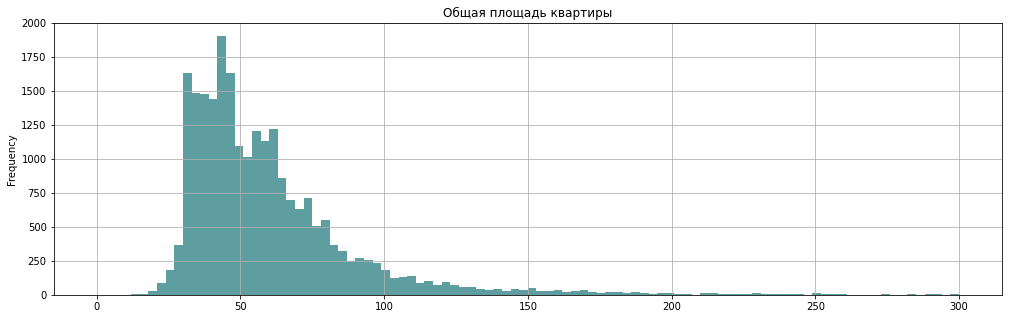

Площадь самой маленькой квартиры: 12.0 кв.м.
Площадь самой большой квартиры: 900.0 кв.м.
Средняя площадь квартир: 60 кв.м.
Медианная площадь квартир: 52 кв.м.


In [53]:
# общая площадь квартир

df.total_area.plot  \
            (kind='hist',bins=100, range=(0, 300), figsize=(17,5), \
             grid=True, title='Общая площадь квартиры',color = "cadetblue"
            )
plt.show()

print(f'Площадь самой маленькой квартиры: {df.total_area.min()} кв.м.')
print(f'Площадь самой большой квартиры: {df.total_area.max()} кв.м.')
print(f'Средняя площадь квартир: {round((df.total_area).mean())} кв.м.')
print(f'Медианная площадь квартир: {round((df.total_area).median())} кв.м.')

In [54]:
df.loc[df['total_area'] > 650]

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
19540,Санкт-Петербург,420000000.0,466666.67,900.0,12,409.7,112.0,0,2.8,25,25,последний,False,False,False,8,31.0,8.0,0,NaN,2,0.32,2017-12-06,December,2017,Wednesday,2,106.0


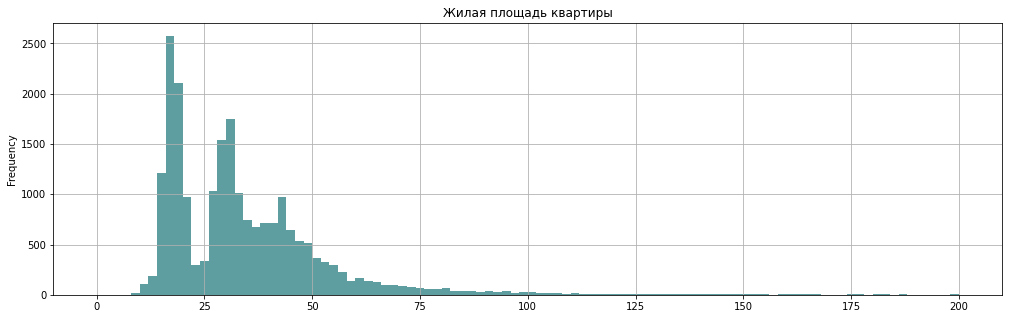

Самая маленькая жилплощадь квартиры: 5.0 кв.м.
Самая большая жилплощадь квартиры: 409.7 кв.м.
Средняя жилплощадь квартир: 34 кв.м.
Медианная жилплощадь квартир: 30 кв.м.


In [55]:
# жилая площадь квартир

df.living_area.plot  \
            (kind='hist',bins=100, range=(0, 200), figsize=(17,5), \
             grid=True, title='Жилая площадь квартиры',color = "cadetblue"
            )
plt.show()

print(f'Самая маленькая жилплощадь квартиры: {df.living_area.min()} кв.м.')
print(f'Самая большая жилплощадь квартиры: {df.living_area.max()} кв.м.')
print(f'Средняя жилплощадь квартир: {round((df.living_area).mean())} кв.м.')
print(f'Медианная жилплощадь квартир: {round((df.living_area).median())} кв.м.')

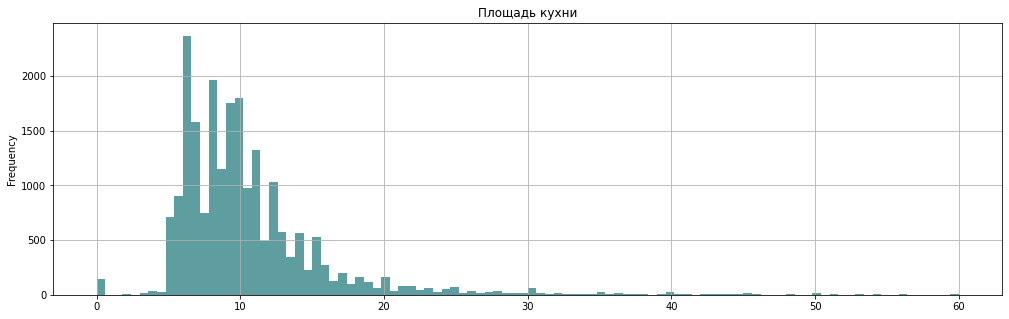

Самая маленькая площадь кухни: 0.0 кв.м.
Самая большая площадь кухни: 112.0 кв.м.
Средняя площадь кухни: 10 кв.м.
Медианная площадь кухни: 9 кв.м.


In [56]:
# кухня

df.kitchen_area.plot  \
                (kind='hist',bins=100, range=(0, 60), figsize=(17,5), \
                 grid=True, title='Площадь кухни',color = "cadetblue"
                )
plt.show()

print(f'Самая маленькая площадь кухни: {df.kitchen_area.min()} кв.м.')
print(f'Самая большая площадь кухни: {df.kitchen_area.max()} кв.м.')
print(f'Средняя площадь кухни: {round((df.kitchen_area).mean())} кв.м.')
print(f'Медианная площадь кухни: {round((df.kitchen_area).median())} кв.м.')

Посмотрим на соотношение метража квартиры и кухни в квартирах с аномально большими(более 100 кв.м.) кухнями.

In [57]:
df.loc[(df['kitchen_area'] > 100) & (df['total_area'] > 150), 'total_area'].value_counts()

249.7    1
900.0    1
255.0    1
Name: total_area, dtype: int64

 В целом, если квартира от 250 кв.м., то и кухня может быть огромной, возможно, это кухня-гостиная.

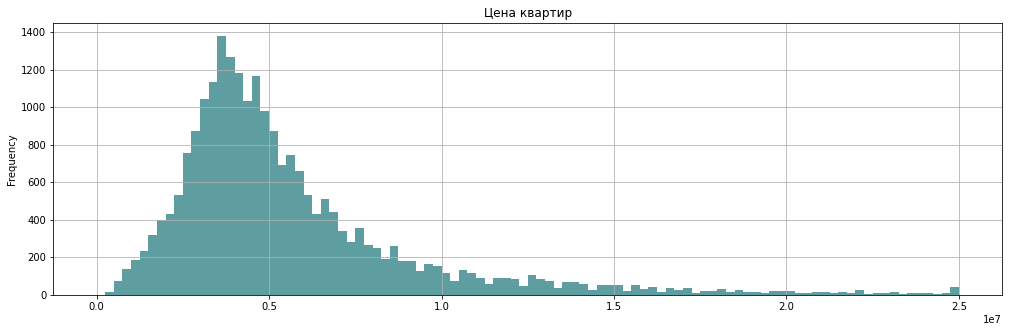

Самая недорогая квартира: 12190.0 р.
Самая дорогая квартира: 763000000.0 р.
Средняя цена квартиры: 6500204 р.
Медианная цена квартиры: 4630000 р.


In [58]:
# цена квартир

df.last_price.plot \
                    (kind='hist', bins=100, range=(0, 25000000), figsize=(17,5), \
                      grid=True, title='Цена квартир',color = "cadetblue"
                     )
plt.show()

print(f'Самая недорогая квартира: {df.last_price.min()} р.')
print(f'Самая дорогая квартира: {df.last_price.max()} р.')
print(f'Средняя цена квартиры: {round((df.last_price).mean())} р.')
print(f'Медианная цена квартиры: {round((df.last_price).median())} р.')

Самая низкая цена определенно подозрительна, допустим, что в пригороде квартира может стоить меньше миллиона, но в Санкт-Петербурге точно нет, посмотрим все квартиры в этом диапазоне:

In [59]:
df.loc[((df.locality_name == 'Санкт-Петербург') & (df['last_price'] < 1000000))]

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
8793,Санкт-Петербург,12190.0,111.83,109.0,2,32.0,40.5,0,2.75,25,25,последний,False,False,False,7,36.0,9.0,1,0.8,0,NaN,2019-03-20,March,2019,Wednesday,2,8.0


Видим, что эта квартира как раз в Санкт-Петербурге. Предлагаю удалить эту строку, так как тут явно ошибка в заполнении стоимости. 

In [60]:
df = df.loc[df['last_price'] > 12190.0]

Снова построим гистаграмму:

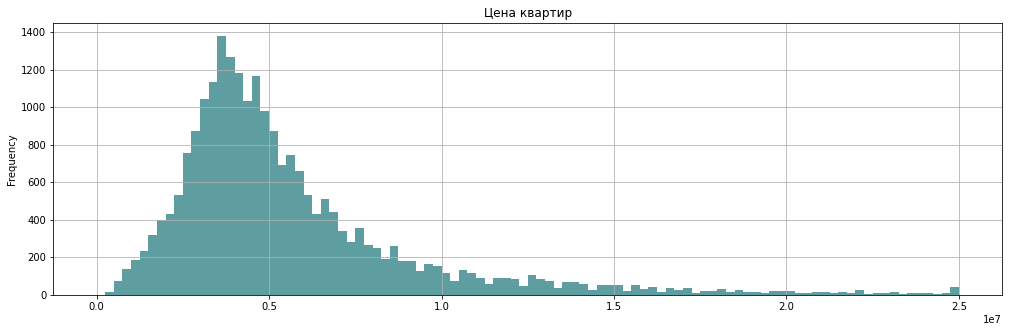

Самая недорогая квартира: 430000.0 р.
Самая дорогая квартира: 763000000.0 р.
Средняя цена квартиры: 6500480 р.
Медианная цена квартиры: 4630000 р.


In [61]:
# цена квартир

df.last_price.plot \
                    (kind='hist', bins=100, range=(0, 25000000), figsize=(17,5), \
                      grid=True, title='Цена квартир',color = "cadetblue"
                     )
plt.show()

print(f'Самая недорогая квартира: {df.last_price.min()} р.')
print(f'Самая дорогая квартира: {df.last_price.max()} р.')
print(f'Средняя цена квартиры: {round((df.last_price).mean())} р.')
print(f'Медианная цена квартиры: {round((df.last_price).median())} р.')

In [62]:
df.loc[(df['last_price'] < 500000)].sort_values('last_price')

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
14911,поселок станции Свирь,430000.0,7962.96,54.0,2,NaN,NaN,0,2.65,3,3,последний,False,False,False,5,NaN,NaN,0,NaN,0,NaN,2018-06-26,June,2018,Tuesday,1,44.0
17456,Сланцы,430000.0,14144.74,30.4,1,16.0,6.0,0,2.65,2,1,первый,False,False,False,7,NaN,NaN,0,NaN,0,NaN,2019-04-22,April,2019,Monday,0,NaN
16274,деревня Старополье,440000.0,11000.00,40.0,1,NaN,NaN,0,2.65,5,1,первый,False,False,False,18,NaN,NaN,0,NaN,0,NaN,2018-07-10,July,2018,Tuesday,1,45.0
5698,городской поселок Будогощь,450000.0,10714.29,42.0,2,23.0,5.8,0,2.65,1,1,первый,False,False,False,7,NaN,NaN,0,NaN,0,NaN,2017-07-31,July,2017,Monday,0,233.0
9581,деревня Старополье,450000.0,10368.66,43.4,2,30.3,5.5,0,2.65,5,3,другой,False,False,False,7,NaN,NaN,0,NaN,0,NaN,2018-08-31,August,2018,Friday,4,96.0
16219,деревня Вахнова Кара,450000.0,11688.31,38.5,2,NaN,NaN,0,2.65,2,1,первый,False,False,False,14,NaN,NaN,0,NaN,0,NaN,2018-07-11,July,2018,Wednesday,2,45.0
17676,деревня Ям-Тесово,450000.0,12328.77,36.5,1,17.3,8.5,1,2.65,5,4,другой,False,False,False,0,NaN,NaN,0,NaN,0,NaN,2018-02-01,February,2018,Thursday,3,120.0
18867,деревня Выскатка,470000.0,11463.41,41.0,1,32.0,9.0,0,2.65,5,3,другой,False,False,False,1,NaN,NaN,0,NaN,0,NaN,2018-02-11,February,2018,Sunday,6,46.0
21912,поселок Совхозный,470000.0,12702.70,37.0,1,NaN,NaN,0,2.65,3,3,последний,False,False,False,0,NaN,NaN,0,NaN,0,NaN,2018-02-18,February,2018,Sunday,6,45.0
23484,Сланцы,470000.0,10561.80,44.5,2,28.0,7.5,0,2.65,2,2,последний,False,False,False,11,NaN,NaN,0,NaN,0,NaN,2018-07-02,July,2018,Monday,0,298.0


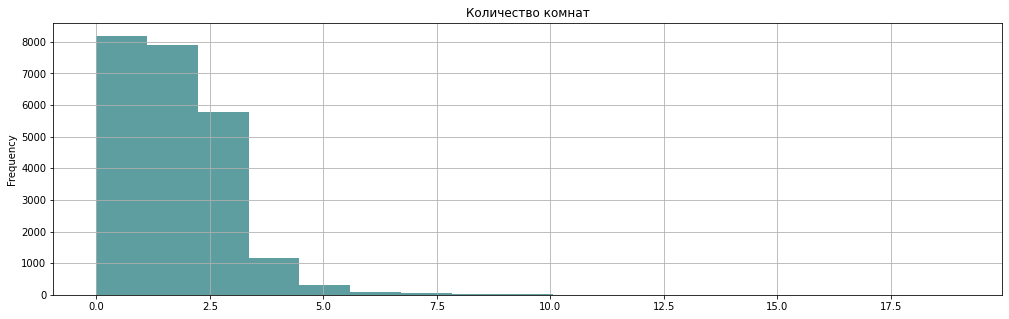

Наименьшее число комнат: 0
Наибольшее число комнат: 19
Среднее число комнат: 2
Медианное число комнат: 2


In [63]:
# количество комнат


df.rooms.plot \
                    (kind='hist', bins=df['rooms'].nunique(), range=(0, 19), figsize=(17,5), \
                      grid=True, title='Количество комнат',color = "cadetblue"
                     )
plt.show()

print(f'Наименьшее число комнат: {df.rooms.min()}')
print(f'Наибольшее число комнат: {df.rooms.max()}')
print(f'Среднее число комнат: {round((df.rooms).mean())}')
print(f'Медианное число комнат: {round((df.rooms).median())}')

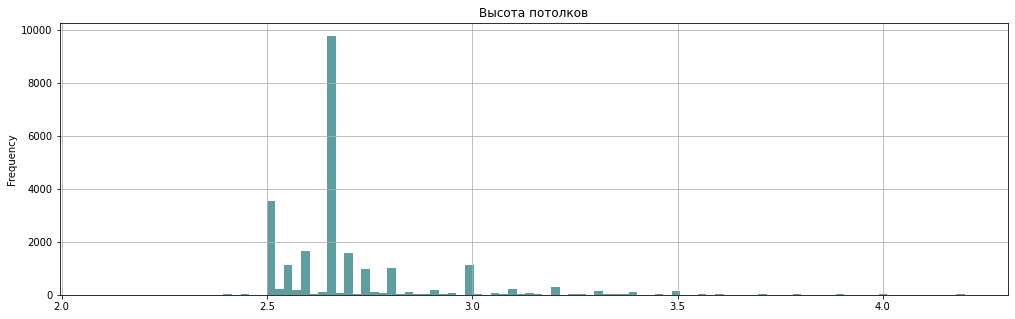

Минимальная высота потолка: 2.2 м.
Максимальная высота потолка: 4.2 м.
Средняя высота потолка: 2.7 м.
Медианная высота потолка: 2.6 м.


In [64]:
# высота потолков


df.ceiling_height.plot \
                    (kind='hist', bins=100, range=(2.1, 4.2), figsize=(17,5), \
                      grid=True, title='Высота потолков',color = "cadetblue"
                     )
plt.show()

print(f'Минимальная высота потолка: {df.ceiling_height.min()} м.')
print(f'Максимальная высота потолка: {df.ceiling_height.max()} м.')
print(f'Средняя высота потолка: {round((df.ceiling_height).mean(),1)} м.')
print(f'Медианная высота потолка: {round((df.ceiling_height).median(),1)} м.')

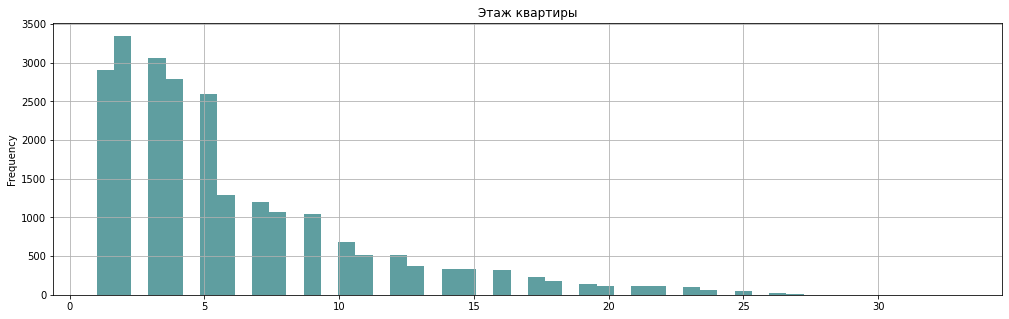

Минимальный этаж квартиры: 1 этаж
Максимальный этаж квартиры: 33 этаж
Средний этаж квартиры: 6 этаж.
Медианный этаж квартиры: 4 этаж.


In [65]:
# этаж


df.floor.plot \
                    (kind='hist', bins=50, range=(1, 33), figsize=(17,5), \
                      grid=True, title='Этаж квартиры',color = "cadetblue"
                     )
plt.show()

print(f'Минимальный этаж квартиры: {df.floor.min()} этаж')
print(f'Максимальный этаж квартиры: {df.floor.max()} этаж')
print(f'Средний этаж квартиры: {round((df.floor).mean())} этаж.')
print(f'Медианный этаж квартиры: {round((df.floor).median())} этаж.')

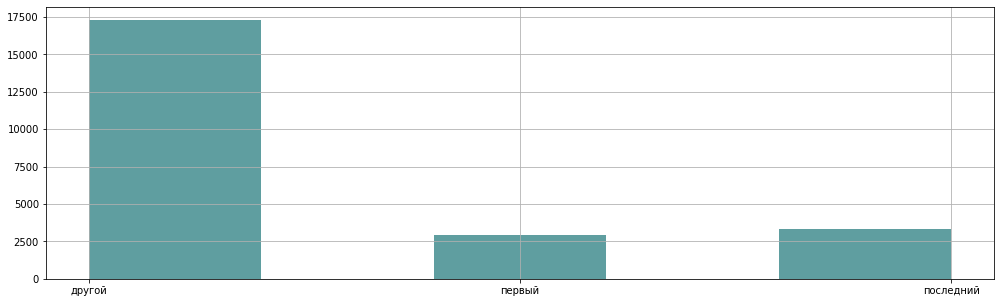

In [66]:
# категории этажей

df.floor_category.hist( figsize=(17,5),bins=5,color = "cadetblue");


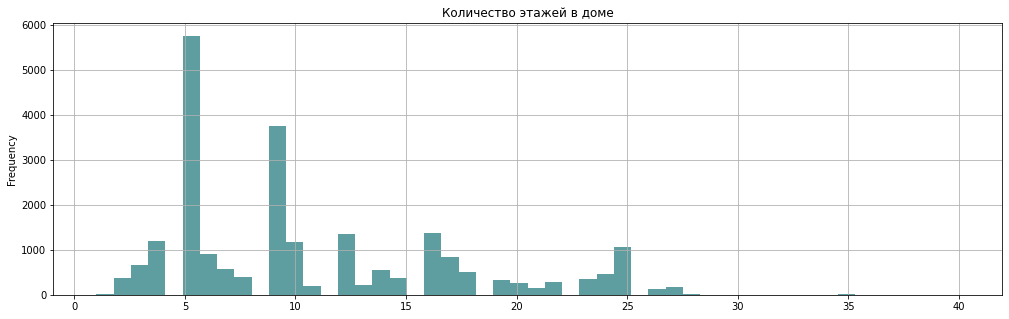

Минимальное число этажей в доме: 1 этаж
Максимальное число этажей в доме: 60 этажей
Среднее число этажей в доме: 11 этажей.
Медианное число этажей в доме: 9 этажей.


In [67]:
# всего этажей

df.floors_total.plot \
                    (kind='hist', bins=50, range=(1, 40), figsize=(17,5), \
                      grid=True, title='Количество этажей в доме',color = "cadetblue"
                     )
plt.show()

print(f'Минимальное число этажей в доме: {df.floors_total.min()} этаж')
print(f'Максимальное число этажей в доме: {df.floors_total.max()} этажей')
print(f'Среднее число этажей в доме: {round((df.floors_total).mean())} этажей.')
print(f'Медианное число этажей в доме: {round((df.floors_total).median())} этажей.')

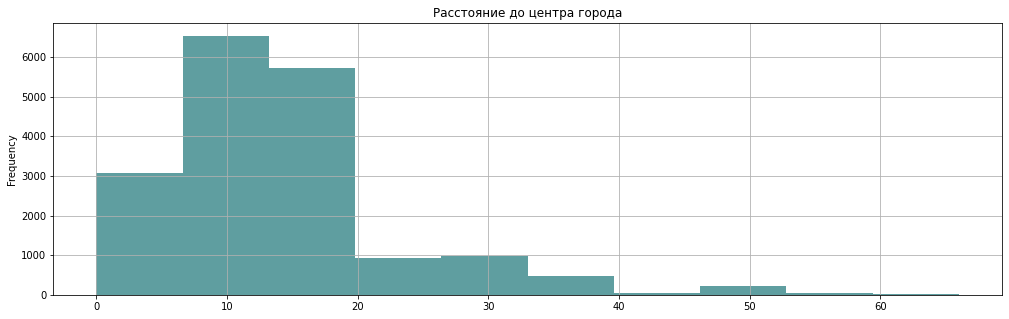

Минимальное расстояние до центра города: 0.0 км.
Максимальное расстояние до центра города: 66.0 км.
Среднее расстояние до центра города: 14 км.
Медианное расстояние до центра города: 13 км.


In [68]:
# расстояние до центра города
df.city_centers_nearest.hist(figsize=(10,5),color = "cadetblue", bins=10)

df.city_centers_nearest.plot \
                    (kind='hist', bins=100, range=(0, 60), figsize=(17,5), \
                      grid=True, title='Расстояние до центра города',color = "cadetblue"
                     )
plt.show()

print(f'Минимальное расстояние до центра города: {df.city_centers_nearest.min()} км.')
print(f'Максимальное расстояние до центра города: {df.city_centers_nearest.max()} км.')
print(f'Среднее расстояние до центра города: {round((df.city_centers_nearest).mean())} км.')
print(f'Медианное расстояние до центра города: {round((df.city_centers_nearest).median())} км.')

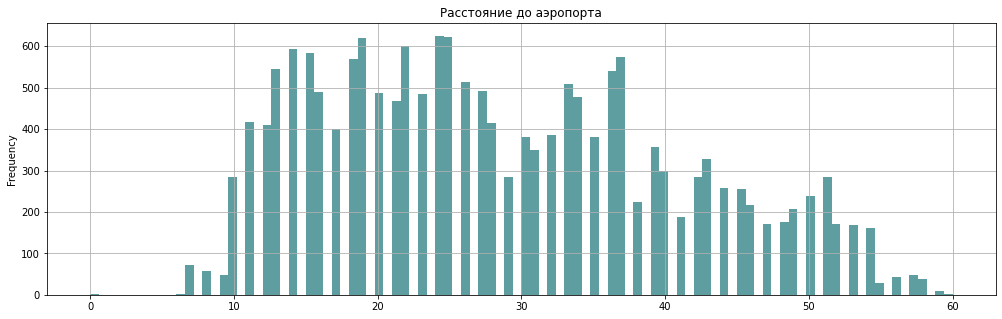

Минимальное расстояние до аэропорта: 0.0 км.
Максимальное расстояние до аэропорта: 85.0 км.
Среднее расстояние до аэропорта: 29 км.
Медианное расстояние до аэропорта: 27 км.


In [69]:
# расстояние до ближайшего аэропорта

df.airports_nearest.plot \
                    (kind='hist', bins=100, range=(0, 60), figsize=(17,5), \
                      grid=True, title='Расстояние до аэропорта',color = "cadetblue"
                     )
plt.show()

print(f'Минимальное расстояние до аэропорта: {df.airports_nearest.min()} км.')
print(f'Максимальное расстояние до аэропорта: {df.airports_nearest.max()} км.')
print(f'Среднее расстояние до аэропорта: {round((df.airports_nearest).mean())} км.')
print(f'Медианное расстояние до аэропорта: {round((df.airports_nearest).median())} км.')

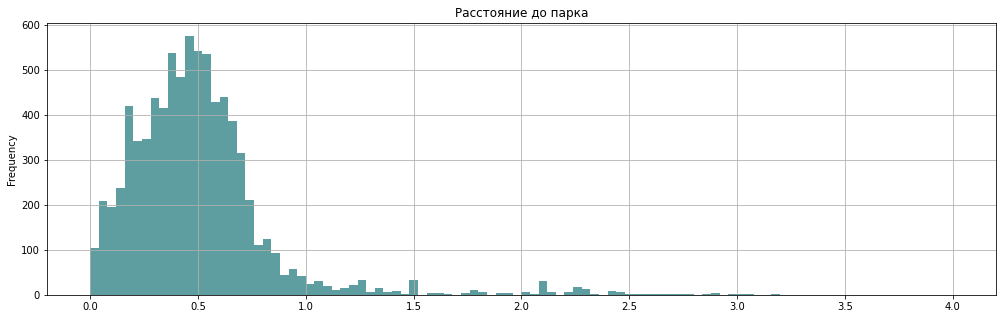

Минимальное расстояние до парка: 0.0 км.
Максимальное расстояние до парка: 3.19 км.
Среднее расстояние до парка: 0.5 км.
Медианное расстояние до парка: 0.5 км.


In [70]:
# расстояние до ближайшего парка

df.parks_nearest.plot \
                    (kind='hist', bins=100, range=(0, 4), figsize=(17,5), \
                      grid=True, title='Расстояние до парка',color = "cadetblue"
                     )
plt.show()

print(f'Минимальное расстояние до парка: {df.parks_nearest.min()} км.')
print(f'Максимальное расстояние до парка: {df.parks_nearest.max()} км.')
print(f'Среднее расстояние до парка: {round((df.parks_nearest).mean(),1)} км.')
print(f'Медианное расстояние до парка: {round((df.parks_nearest).median(),1)} км.')

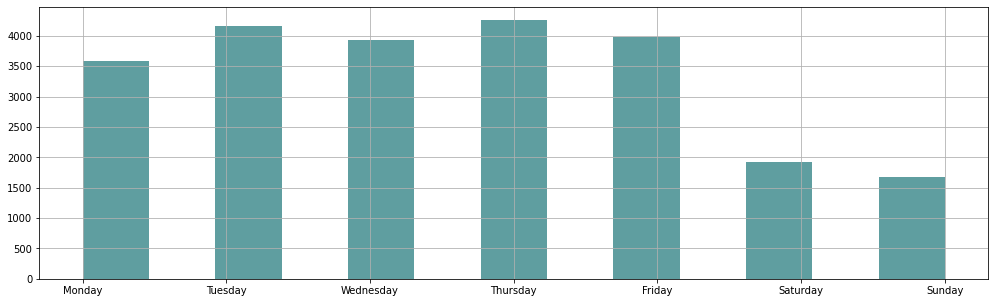

In [71]:
# день недели публикации объявления
df.sort_values('week_day', inplace=True)
df.exposition_week_day.hist(figsize=(17,5),color = "cadetblue", bins=13);



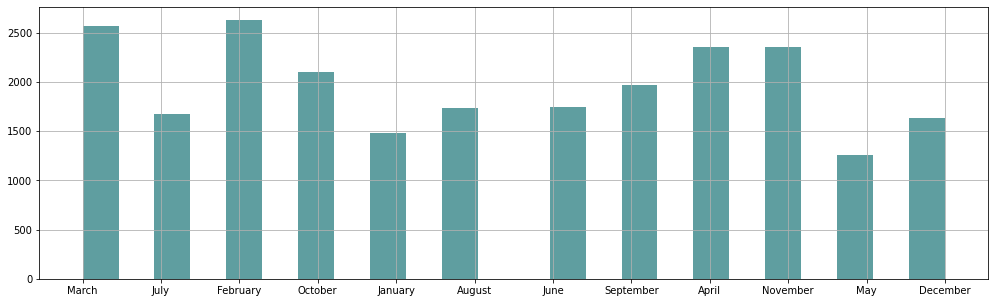

In [72]:
# месяц публикации объявления

df.exposition_month.hist(figsize=(17,5),color = "cadetblue", bins=24);

### **Выводы**

- Половина из всех квартир площадью до 52 кв.м. Средняя площадь 60 кв.м.  Самая маленькая 12 кв.м., самая большая 900 кв.м., возможно расселенная коммунальная или бывший доходный дом.

-  В среднем,  в квартирах жилплощадь до 34 кв.м. при этом есть аномальные квартиры с жилплощадью в 5 кв.м. и 409.7 кв.м. Медианная жилплощадь, тем не менее не сильно отклоняется от средней и составляет 30 кв.м. 

- В половине квартир кухня до 9 кв.м., в среднем у всех квартир кухни до 10 кв.м., но есть аномально большая кухня в 112 кв.м. Возможно этокухня-гостиная в огромной коммуналке( так как общий метраж этой квартиры 900 кв.м.) Самые маленкие кухни 0 кв.м., так как в квартирах-студиях нет отдельной кухни.

- Самая недорогая квартира 430 тыс. р., располодена она Сланцах, недалеко от границы с Эстонией, так что такая цена оправдана. Самая дорогая квартира стоит 763 млн. р. В целом, такой ценник избыточен, но возможен.  Половина квартир стоит до 4 млн. 646 тыс.р. А средний ценник составляет 6 млн. 540 тыс.р.

- В основном, продают двухкомнатные квартиры. После 3 комнат число объявлений резко снижается.  Максимальное количество комнат в квартире в продаже - 19.

- Минимальные потолки в продающейся квартире составляют 2.2. м, максимальные 4.2.  Самая распространенная высота потолка составляет 2.6-2.7 м.

- Чаще всего квартиры продают на 1-3 этажах. Основная масса квартир расположена до 5 этажа и наблюдается езкое снижение количества объявлений свыше 9-ого этажа. Так же в гистограмме по общему колиечтсву этажей наблюдаются явные пики в 5 и 9 этажах,  что логично, в Питере  и пригородах превальвирует 5-9 этажная застройка. В основном, в продаже квартиры находящиеся не на 1-ом или последнем этаже, а на промежуточных

- Большая часть квартир продается ва растоянии 14 км от центра города, что логично, почти весь Петербург расположен на этом растоянии от центра. А в пригородах, сами пригороды обычно менее 10 км размером. Скорее всего показатели более 15 км здесь появились потому, что вследствие ошибки было указано расстояние до центра Санкт-Петербурга, а сама квартира в пригороде.

- Как правило, при покупке квартиры расстояние до аэропорта не учитывается, поэтому виден довольно большой разброс. В Санкт-Петербурге только один аэропорт и квартиры расоложены иногда на большом расстоянии от него. При этом имется аномалии, где указано, что до аэропорта 0 м., это  техническая ошибка.

- В Санкт-Петербурге и Ленобласти много зеленых зон, поэтому в основном большая часть квартир расположена в пешей доступности о парка, примерно в 500 метрах. Очень редко, когда до ближайшего парка следует пройти более 900 м.

- Меньше всего публикаций в выходные дни. Так же немного меньше публикаций в понедельник, в отличие от остальных будничных дней.Больше всего объявлений о продаже квартир подают в марте и феврале, а меньше всего в январе и мае.

### Скорость продажи квартир

Изучим, как быстро продавались квартиры (столбец days_exposition).

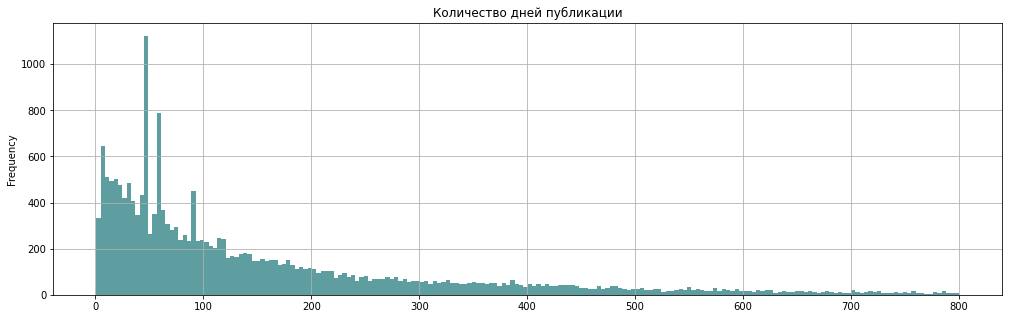

In [73]:
df.days_exposition.plot \
                    (kind='hist', bins=200, range=(1, 800), figsize=(17,5), \
                      grid=True, title='Количество дней публикации',color = "cadetblue"
                     );

По графику видно, что большая часть квартир продается до 100 дней, так что построим новую гистограмму.

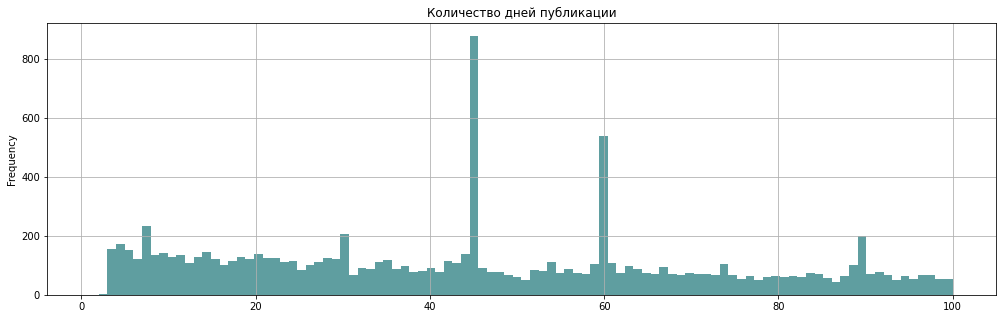

Минимальное количество дней публикации: 1 день.
Максимальное количество дней публикации: 1580 дней.
Среднее количество дней публикации: 181 день.
Медианное количество дней публикации: 95 дней.


In [74]:
df.days_exposition.plot \
                    (kind='hist', bins=100, range=(1, 100), figsize=(17,5), \
                      grid=True, title='Количество дней публикации',color = "cadetblue")
                     
plt.show()

print(f'Минимальное количество дней публикации: {round(df.days_exposition.min())} день.')
print(f'Максимальное количество дней публикации: {round(df.days_exposition.max())} дней.')
print(f'Среднее количество дней публикации: {round((df.days_exposition).mean())} день.')
print(f'Медианное количество дней публикации: {round((df.days_exposition).median())} дней.')

In [75]:
df.days_exposition.describe()

count    20353.000000
mean       180.595834
std        219.537945
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**

В среднем, продажа завершается за 180 дней. Из них целых 25 процентов продаж совершается до 45 дней, однако даже есть продажа за 1 день, что аномально быстро. Также есть аномально долгие продажи (самая длительная 1580 дней, или 4,3 года).

### Факторы влияющие  на общую стоимость квартиры


Рассмотрим какие факторы более остальных влияют на стоимость квартиры. Для этого построим хитмэп:

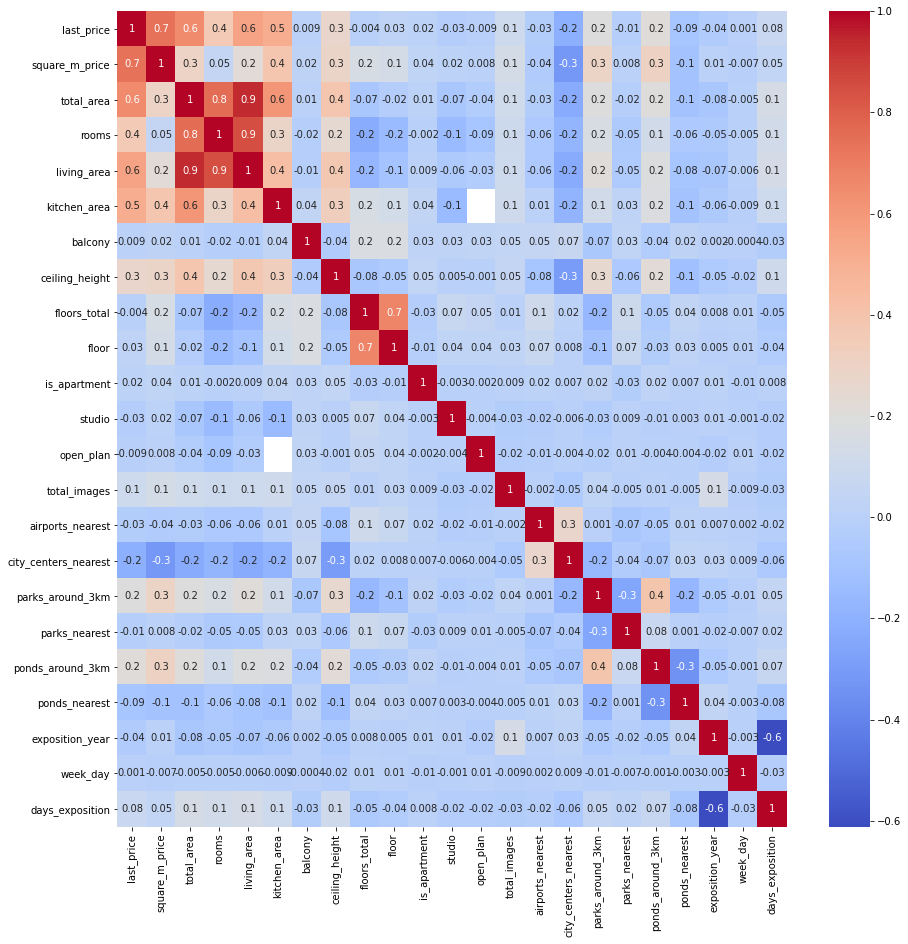

In [76]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm');

Далее рассмотрим отдельно некоторые факторы:

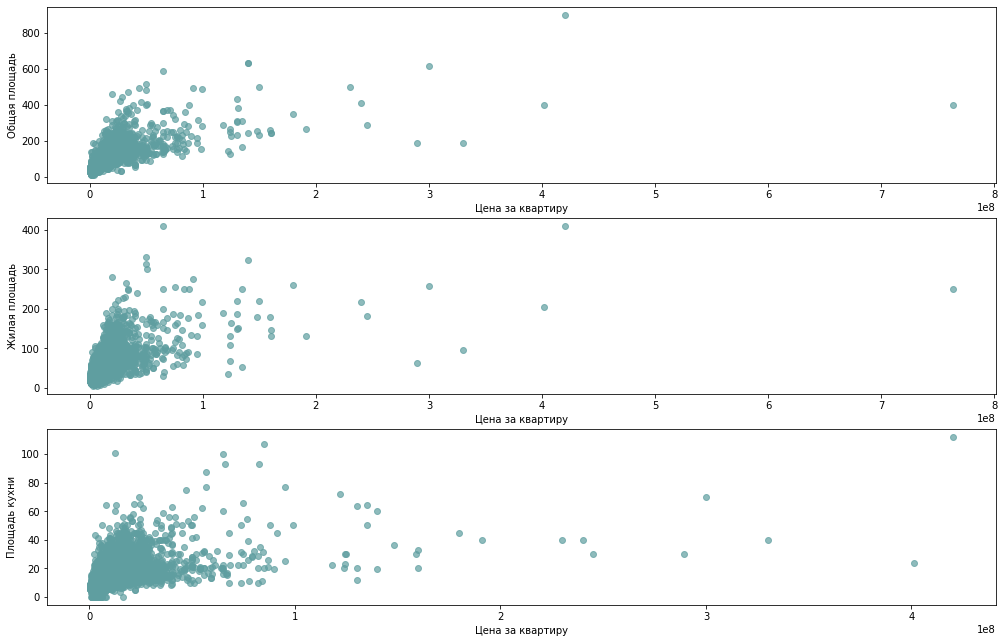

Коэффициент корреляции с общей площадью: 0.65
Коэффициент корреляции с жилой площадью: 0.56
Коэффициент корреляции с площадью кухни: 0.52


In [77]:
# корреляция с общей площадью квартиры
fig, ax = plt.subplots(3, figsize=(17, 11))
ax[0].scatter(x = df['last_price'], y = df['total_area'], c='cadetblue', alpha=0.7)
ax[0].set_xlabel("Цена за квартиру")
ax[0].set_ylabel("Общая площадь")

# корреляция с жилплощадью
ax[1].scatter(x = df['last_price'], y = df['living_area'], c='cadetblue', alpha=0.7)
ax[1].set_xlabel("Цена за квартиру")
ax[1].set_ylabel("Жилая площадь")

# корреляция с площадью кухни
ax[2].scatter(x = df['last_price'], y = df['kitchen_area'], c='cadetblue', alpha=0.7)
ax[2].set_xlabel("Цена за квартиру")
ax[2].set_ylabel("Площадь кухни")

plt.show()

print( f'Коэффициент корреляции с общей площадью: {round(df.last_price.corr(df.total_area),2)}')
print( f'Коэффициент корреляции с жилой площадью: {round(df.last_price.corr(df.living_area),2)}')
print( f'Коэффициент корреляции с площадью кухни: {round(df.last_price.corr(df.kitchen_area),2)}')

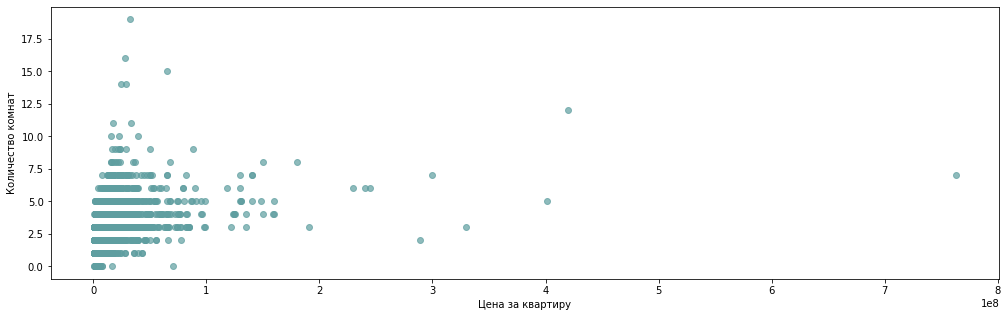

Коэффициент корреляции: 0.36


In [78]:
# корреляция с количествм комнат

fig, ax = plt.subplots(figsize=(17, 5))
ax.scatter(x = df['last_price'], y = df['rooms'], c='cadetblue', alpha=0.7)
plt.xlabel("Цена за квартиру")
plt.ylabel("Количество комнат")

plt.show()

print( f'Коэффициент корреляции: {round(df.last_price.corr(df.rooms),2)}')

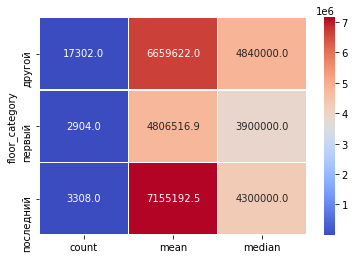

In [79]:
piv_floor = df.pivot_table( index='floor_category', values = 'last_price', aggfunc=('count','mean','median'))

sns.heatmap(piv_floor, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm');

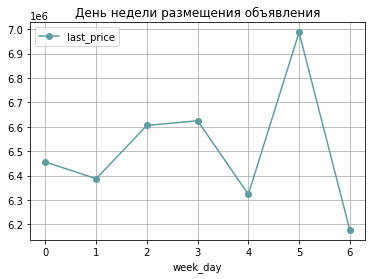

In [80]:
piv_day = df.pivot_table(index='week_day',
    values='last_price', aggfunc='mean')


piv_day.plot(style='o-',
                  grid=True, title='День недели размещения объявления', c='cadetblue');


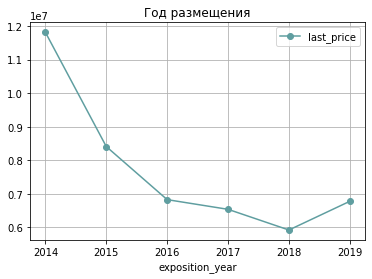

In [81]:
piv_month = df.pivot_table(index='exposition_year',
    values='last_price', aggfunc='mean')


piv_month.plot(style='o-',
                  grid=True, title='Год размещения', c='cadetblue');



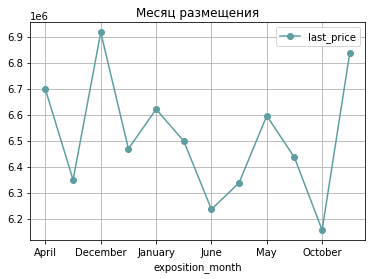

In [82]:
piv_month = df.pivot_table(index='exposition_month',
    values='last_price', aggfunc='mean')


piv_month.plot(style='o-',
                  grid=True, title='Месяц размещения', c='cadetblue');


In [83]:
# для наглядностт выведем карту корреляции с самыми коррелируемыми признаками отдельно
corr = df[['last_price','square_m_price','total_area',\
           'living_area','kitchen_area','rooms']].corr()
corr.style.background_gradient()

,last_price,square_m_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.735895,0.647944,0.558115,0.515059,0.359262
square_m_price,0.735895,1.000000,0.298556,0.219959,0.389087,0.051301
total_area,0.647944,0.298556,1.000000,0.938539,0.610467,0.760677
living_area,0.558115,0.219959,0.938539,1.000000,0.427488,0.850098
kitchen_area,0.515059,0.389087,0.610467,0.427488,1.000000,0.283962
rooms,0.359262,0.051301,0.760677,0.850098,0.283962,1.000000


**Выводы:**

По тепловой карте и диаграммам видно, что цена имеет значимую корелляцию (более 0,4 и менее -0,4) со следующими показателями:  square_m_price, total_area, rooms, living_area, kitchen_area.  Остальные показатели коррелируют меньше, самый низкий уровень корреляции с: balcony, floors_total, open_plan. 

- Вполне закономерно мы наблюдаем корреляцию цены с размером самой квартиры и отдельных её зон, ведь квартира больше, тем она дороже. 

- Судя по диаграмме, количество комнат, конечно, влияет на цену квартиры, однако, есть много вариантов с одинаковым количеством комнат, но очень разным ценником. Значит есть другие, более значимые факторы.

- Видно, что цена за квариры на первом этаже меньше чем на остальных этажах.  В среднем, самые дороие квартиры на последних этажах. но такое искажение среднего от медианы связано скорее всего с наличием так называемых пентхаусов, которые очень дорогие. В  основом, люди предпочитают не первый и не последний этаж., соответственно цена на квартиры на других этажах выше.

- Чаще всего объявления о продаже квартир подают в будни, в пятницу и выходные наблюдается резкий спад.  Чаще всего квартиры собираются продавать в декабре а реже всего в июне.

### Стоимость квадратного метра в разных населенных пунктах

In [84]:
# выведем список с том 10 городов по количеству объявлений и посмотрим среднюю цену за 1 кв.м.
piv_max = df.pivot_table(index='locality_name', values = 'square_m_price', aggfunc= ('count','mean')) \
         .sort_values(by= 'count', ascending=False).head(10)
           
piv_max

,count,mean
locality_name,,
Санкт-Петербург,15615,114693.458567
Мурино,586,86041.116024
поселок Шушары,439,78551.344647
Всеволожск,397,68719.320378
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


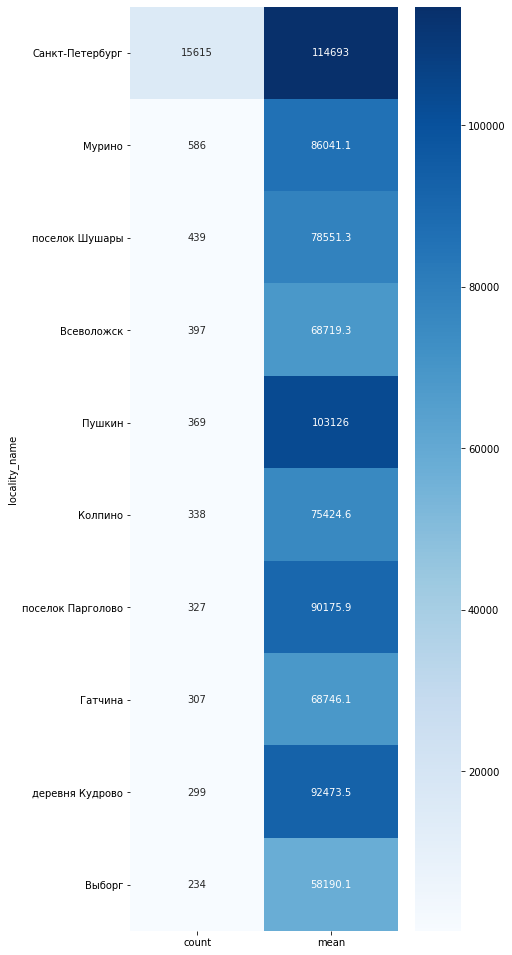

In [85]:
fig,ax=plt.subplots(figsize=(6,17))
sns.heatmap(piv_max,annot = True,fmt='.6g', cmap="Blues",ax=ax)
plt.show()

In [86]:
# топ 10 городов с самой высокой ценой за кв.м.
df.groupby('locality_name').agg({'square_m_price':'mean'}).sort_values(by='square_m_price', ascending=False).head(10)

,square_m_price
locality_name,
Зеленогорск,115122.799583
Санкт-Петербург,114693.458567
поселок Репино,104238.612500
Пушкин,103125.819377
Сестрорецк,101757.616831
поселок Лисий Нос,100660.816667
Кудрово,100166.294824
деревня Мистолово,98549.977273
поселок Левашово,96997.690000


Как ни странно, стоимость одного кв.м. в Зеленогорске выше, чем в Питере, посмотрим на количество объявлений:

In [87]:
zel_flats = df.loc[df.locality_name == 'Зеленогорск', 'locality_name'].count()
print(f'Число объявлений в Зеленогорске:{zel_flats}')
zel_flats_min = df.loc[df.locality_name == 'Зеленогорск', 'square_m_price'].min()
print(f'Минимальная цена за кв.м. в Зеленогорске:{zel_flats_min}')

zel_flats_max = df.loc[df.locality_name == 'Зеленогорск', 'square_m_price'].max()
print(f'Максимальная цена за кв.м. в Зеленогорске:{zel_flats_max}')


Число объявлений в Зеленогорске:24
Минимальная цена за кв.м. в Зеленогорске:53303.72
Максимальная цена за кв.м. в Зеленогорске:323943.66


In [88]:
spb_flats = df.loc[df.locality_name == 'Санкт-Петербург', 'locality_name'].count()
print(f'Число объявлений в Санкт-Петербурге:{spb_flats}')
spb_flats_min = df.loc[df.locality_name == 'Санкт-Петербург', 'square_m_price'].min()
print(f'Минимальная цена за кв.м. в Санкт-Петербурге:{spb_flats_min}')

spb_flats_max = df.loc[df.locality_name == 'Санкт-Петербург', 'square_m_price'].max()
print(f'Максимальная цена за кв.м. в Санкт-Петербурге:{spb_flats_max}')

Число объявлений в Санкт-Петербурге:15615
Минимальная цена за кв.м. в Санкт-Петербурге:15345.27
Максимальная цена за кв.м. в Санкт-Петербурге:1907500.0


Получается,в Зеленогорске очень мало объявлений, но цена за кв.м. выше(и минимальная, и максимальная), чем в Санкт-Петербурге. Значит там просто дороже квартиры, чем в среднем по Санкт-Петербургу.

In [89]:
# топ 10 городов с самой низкой ценой за кв.м.
df.groupby('locality_name').agg({'square_m_price':'mean'}).sort_values(by='square_m_price', ascending=True).head(10)

,square_m_price
locality_name,
деревня Старополье,11206.220
поселок станции Свирь,11481.480
деревня Вахнова Кара,11688.310
деревня Выскатка,12335.480
поселок Совхозный,12629.130
деревня Малая Романовка,12724.550
поселок Тесово-4,12931.030
деревня Сижно,13709.680
деревня Ям-Тесово,13711.555


**Выводы:**

Топ три города по количеству объявлений, это:
Санкт-Петербург (15651 объявлений, со средней ценой кв.м. 114869 р.)
Мурино (586 объявлений, со средней ценой кв.м.	86041 р.)
Шушары	(439 объявлений, со средней ценой кв.м. 78551 р.)

Самые дорогие квадратные метры в Зеленогорске, там  подано всего 24 объявления, а цена за 1 кв.м. составляет 115123 р.
Самые дешевые квартиры в деревне Старополье (11206 р.), поселке-станции Свирь (11482 р.) и в деревне Вахнова Кара (11688 р.)

### Средняя цена каждого км до центра города

In [90]:
# выделим в отдельный датафрейм данные только по Санкт-Петербургу
df_spb = df[df.locality_name == 'Санкт-Петербург']
df_spb.head()

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
10853,Санкт-Петербург,5500000.0,101851.85,54.00,3,NaN,NaN,0,2.65,12,5,другой,False,False,False,6,42.0,12.0,2,0.37,0,NaN,2016-07-04,July,2016,Monday,0,57.0
10852,Санкт-Петербург,3710000.0,104624.93,35.46,1,14.4,9.3,2,2.65,21,20,другой,False,False,False,7,18.0,16.0,0,NaN,2,0.52,2015-02-09,February,2015,Monday,0,1079.0
3630,Санкт-Петербург,5200000.0,108333.33,48.00,2,28.0,7.0,0,2.50,9,8,другой,False,False,False,20,36.0,12.0,1,0.49,1,0.55,2019-03-11,March,2019,Monday,0,NaN
10845,Санкт-Петербург,8250000.0,150000.00,55.00,2,36.0,8.0,0,4.00,5,5,последний,False,False,False,19,10.0,10.0,1,0.24,0,NaN,2017-10-16,October,2017,Monday,0,336.0
10835,Санкт-Петербург,4700000.0,117500.00,40.00,1,18.0,9.0,0,2.65,17,14,другой,False,False,False,19,51.0,15.0,0,NaN,0,NaN,2017-01-23,January,2017,Monday,0,30.0


In [91]:
spb_km_price = df_spb.pivot_table(index='city_centers_nearest', values='square_m_price', aggfunc='mean').round()
spb_km_price.head()

,square_m_price
city_centers_nearest,
0.0,247583.0
1.0,175674.0
2.0,157494.0
3.0,121508.0
4.0,132933.0


<AxesSubplot:title={'center':'Стоимость кв.м., в зависимости от удаленности от центра Санкт-Петербурга'}, xlabel='city_centers_nearest'>

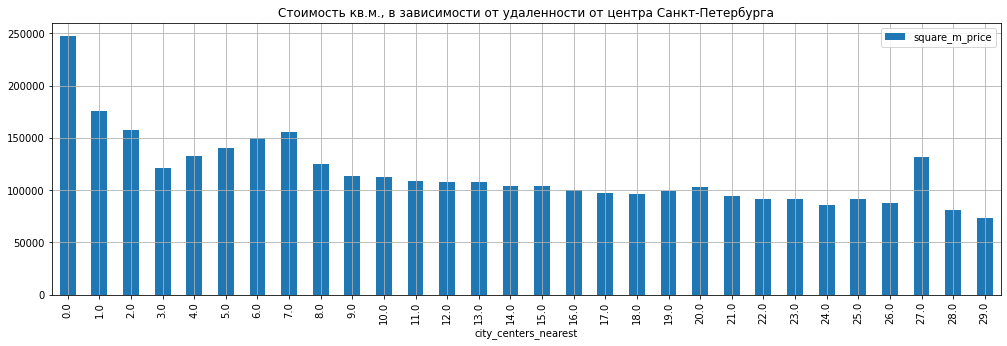

In [92]:
spb_km_price.plot(
    y='square_m_price', kind= 'bar', grid=True, figsize=(17, 5), \
    title='Стоимость кв.м., в зависимости от удаленности от центра Санкт-Петербурга')

Есть на графике странный пик на 27-ом километре, посмотрим эти объявления:


In [93]:
df_spb_27km = df_spb[df_spb.city_centers_nearest == 27.0]
df_spb_27km.head()

,locality_name,last_price,square_m_price,total_area,rooms,living_area,kitchen_area,balcony,ceiling_height,floors_total,floor,floor_category,is_apartment,studio,open_plan,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,exposition_month,exposition_year,exposition_week_day,week_day,days_exposition
748,Санкт-Петербург,14350000.0,193918.92,74.0,2,30.0,25.0,0,3.13,5,3,другой,False,False,False,13,24.0,27.0,1,1.5,0,NaN,2017-11-28,November,2017,Tuesday,1,128.0
5961,Санкт-Петербург,2250000.0,70312.50,32.0,1,16.5,7.0,0,2.65,2,2,последний,False,False,False,6,24.0,27.0,0,NaN,0,NaN,2018-02-27,February,2018,Tuesday,1,178.0


**Выводы:**

Цена на квартиры безусловно зависит от расстояния до центра города На графике видно, что после 7 км наблюдается плавный спад стоимости и только на 27 км наблюдается подозрительный рост цены, так как на этом расстоянии имеется квартира с чрезвычайно высокой для такого расположения ценой в 14,35 млн.р. 

## Общий вывод

**Вывод**
1. В данных есть множество пропусков в столбцах.
2. Есть вопросы к типам данных: некоторые столбцы являются float, хотя логичнее было бы использовать int.
3. Тип first_day_exposition - object, надо будет привести к типу даты.
4. Есть объявление где количество комнат 0, чего быть не должно. Так  же есть объявления где расстояние ло аэропорта 0 метров, а до парка 1 м. Это тоже нужно проверить.
5.  Так же следует проверить стометровый (и однометровый) потолок в квартире. 
6. Есть аномально низкие значения в метраже жилой зоны, надо проверить.


Множество пропусков в таких объявлениях связано по большей частью с невнимательностью (непроставление "0", если что-то отсутствует(пр. балкон или парк рядом), неправильное разделение числа запятой(пр. высота потолка). Также есть пропуски, связанные с техническими сбоями ( нет метража до ближайшего парка, аэропорта, центра города). Скорее всего проблемы с программой, которая автоматически это проставляла. К сожалению, не все пропуски возможно было заполнить, так тчо некоторые строки пришлось удалить( они составили микро часть от всего датасета), другие я решила оставить с пропусками и посмотреть, как эти пропуски скажутся на дальнейшей работе.

Типы некоторых колонок я изменила к более удобному формату, например дата теперь праспознается как дата, а число этажей, комнат и т.д. целое, так как не может быть дробным.

Почистила дублирующие названия в адресном столбце.

Для дальшнейших работ были добавлены новые столбцы. Все столбцы были расположены в более удобном для восприятия порядке. 

**Выводы**

Половина из всех квартир площадью до 52 кв.м. Средняя площадь 60 кв.м. Самая маленькая 12 кв.м., самая большая 900 кв.м., возможно расселенная коммунальная или бывший доходный дом.

В среднем, в квартирах жилплощадь до 34 кв.м. при этом есть аномальные квартиры с жилплощадью в 5 кв.м. и 409.7 кв.м. Медианная жилплощадь, тем не менее не сильно отклоняется от средней и составляет 30 кв.м.

В половине квартир кухня до 9 кв.м., в среднем у усех квартир кухни до 10 кв.м., но есть аномально большая кухня в 112 кв.м. Возможно это кухня-гостиная, сама квартра при этом тоже большая 900 кв.м.. Самые маленкие кухни 0 кв.м., так как в квартирах-студиях нет отдельной кухни.

Есть очень дешевая квартира, стоимостью в 450000 р., она продается в деревне, на очень болшом отдалении от Сакт-Петербурга. Самая дорогая квартира стоит 763 млн. р. В целом, такой ценник избыточен, но возможен. Половина квартир стоит до 4 млн. 646 тыс.р. А средний ценник составляет 6 млн. 540 тыс.р.

В основном, продают двухкомнатные квартиры. После 3 комнат число объявлений резко снижается. Максимальное кодичество комнат в квартире в продае - 19.

Минимальные потолки в продающейся квартире составляют 2.2. м, максимальные 4.2. Самая распространенная высота потолка составляет 2.6-2.7 м.

Чаще всего квартиры продают на 1-3 этажах. Основная масса квартир расположена до 5 этажа и наблюдается езкое снижение количества объявлений свыше 9-ого этажа. Так же в гистограмме по общему колиечтсву этажей наблюдаются явные пики в 5 и 9 этажах, что логично, в Питере и пригородах превальвирует 5-9 этажная застройка. В основном, в продаже квартиры находящиеся не на 1-ом или последнем этаже, а на промежуточных

Большая часть квартир продается на растоянии 14 км от центра города, что логично, почти весь Петербург расположен на этом растоянии от центра. А в пригородах, сами пригороды обычно менее 10 км размером. Скорее всего показатели более 15 км здесь появились потому, что вследствие ошибки было указано расстояние до центра Санкт-Петерьурга, а сама квартира в пригороде.

Как правило, при покупке квартиры расстояние до аэропорта не учитывается, поэтому виден довольно большой разброс. В Санкт-Петербурге только один аэропорт и квартиры расоложены иногда на большом расстоянии от него. При этом имется аномалии, где указано, что до аэропорта 0 м., это техническая ошибка.

В Санкт-Петербурге и Ленобласти много зеленых зон, поэтому в основном большая часть квартир расположена в пешей доступности о парка, примерно в 500 метрах. Очень редко, когда до ближайшего парка следует пройти более 900 м.

Меньше всего публикаций в выходные дни. Так же немного меньше публикаций в понедельник, в отличие от остальных будничных дней.Больше всего объявлений о продаже квартир подают в марте и феврале, а меньше всего в январе и мае.

В среднем, продажа завершается за 180 дней. Из них целых 25 процентов продаж совершается до 45 дней, однако даже есть продажа за 1 день, что аномально быстро. Также есть аномально долгие продажи (самая длительная 1580 дней, или 4,3 года).

По тепловой карте и диаграммам видно, что цена имеет значимую корелляцию (более 0,4 и менее -0,4) со следующими показателями: square_m_price, total_area, rooms, living_area, kitchen_area. Остальные показатели коррелируют меньше, самый низкий уровень корреляции с: balcony, floors_total, open_plan.

Вполне закономерно мы наблюдаем корреляцию цены с размером самой квартиры и отдельных её зон, ведь квартира больше, тем она дороже.

Судя по диаграмме, количество комнат, конечно, влияет на цену квартиры, однако, есть много вариантов с одинаковым количеством комнат, но очень разным ценником. Значит есть другие, более значимые факторы.

Корреляция параметра этажа с ценой минимальна, значит от этажа цена несильно зависит. Действительно, в редких случаях бывает ценник ниже, если первый этаж дома, но зачастую цена от этажа не изменяется.

Корреляция во всех случаях манипуляций с датой небольшая. Получается, что в один и тот же день(месяц, год) могут быть размещены вбсолютно разные по стоимости квартиры.

Топ три города по количеству объявлений, это: Санкт-Петербург (15651 объявлений, со средней ценой кв.м. 114869 р.) Мурино (586 объявлений, со средней ценой кв.м. 86041 р.) Шушары (439 объявлений, со средней ценой кв.м. 78551 р.)

Самые дорогие квадратные метры в Зеленогорске, там подано всего 24 объявления, а цена за 1 кв.м. составляет 115123 р. Самые дешевые квартиры в деревне Старополье (11206 р.), поселке-станции Свирь (11482 р.) и в деревне Вахнова Кара (11688 р.)

Цена на квартиры безусловно зависит от расстояния до центра города На графике видно, что после 7 км наблюдается плавный спад стоимости и только на 27 км наблюдается подозрительный рост цены, так как на этом расстоянии имеется квартира с чрезвычайно высокой для такого расположения ценой в 14,35 млн.р. 